In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import zipfile as zp
import os
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# Read the data
df = pd.read_csv('twitter_user_data.csv', encoding='ISO-8859-1')

# Display the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


# Handling Missing Data

In [ ]:
# Dropping columns with more than 90% missing values
df_cleaned = df.drop(columns=['gender_gold', 'profile_yn_gold', 'tweet_coord'])

# Filling missing values in 'description', 'user_timezone', and 'tweet_location' with a placeholder 'Unknown'
df_cleaned['description'].fillna('Unknown', inplace=True)
df_cleaned['user_timezone'].fillna('Unknown', inplace=True)
df_cleaned['tweet_location'].fillna('Unknown', inplace=True)

# Dropping rows where 'gender' is missing (as it's a small percentage of rows with missing data)
df_cleaned = df_cleaned.dropna(subset=['gender'])

# Drop the 'profile_yn' column since it is not relevant to human/non-human classification
df_cleaned = df_cleaned.drop(columns=['profile_yn'])

# Now that we have handled the missing data, you can proceed with further analysis
df_cleaned.info()  # Display the structure of the cleaned dataset
df_cleaned.head()  # Display the first few rows of the cleaned dataset

<class 'pandas.core.frame.DataFrame'>
Index: 19953 entries, 0 to 20049
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               19953 non-null  int64  
 1   _golden                19953 non-null  bool   
 2   _unit_state            19953 non-null  object 
 3   _trusted_judgments     19953 non-null  int64  
 4   _last_judgment_at      19903 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      19953 non-null  float64
 7   profile_yn:confidence  19953 non-null  float64
 8   created                19953 non-null  object 
 9   description            19953 non-null  object 
 10  fav_number             19953 non-null  int64  
 11  link_color             19953 non-null  object 
 12  name                   19953 non-null  object 
 13  profileimage           19953 non-null  object 
 14  retweet_count          19953 non-null  int64  
 15  sidebar

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn:confidence,created,description,...,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,1.0,12/5/13 1:48,i sing my own rhythm.,...,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,...,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,6.587300e+17,Unknown,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,1.0,11/28/14 11:30,louis whining and squealing and all,...,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",...,douggarland,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,...,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40,6.587300e+17,Unknown,Unknown


# Exploratory Data Analysis (EDA)

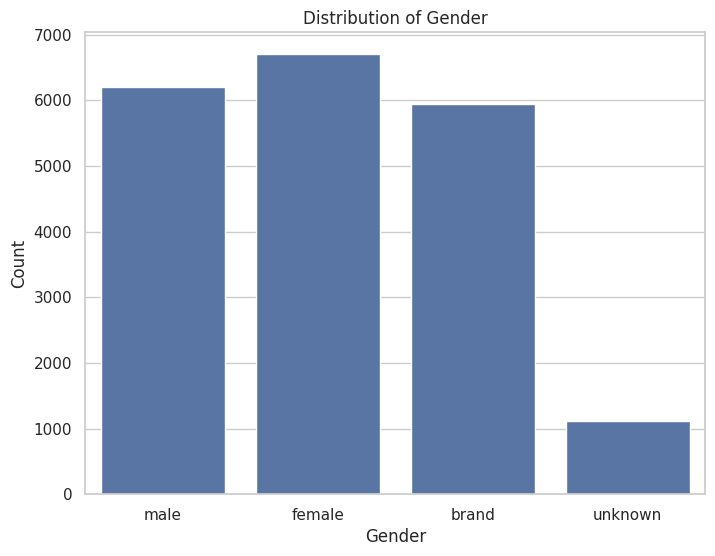

In [ ]:
# Distribution of gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df_cleaned)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

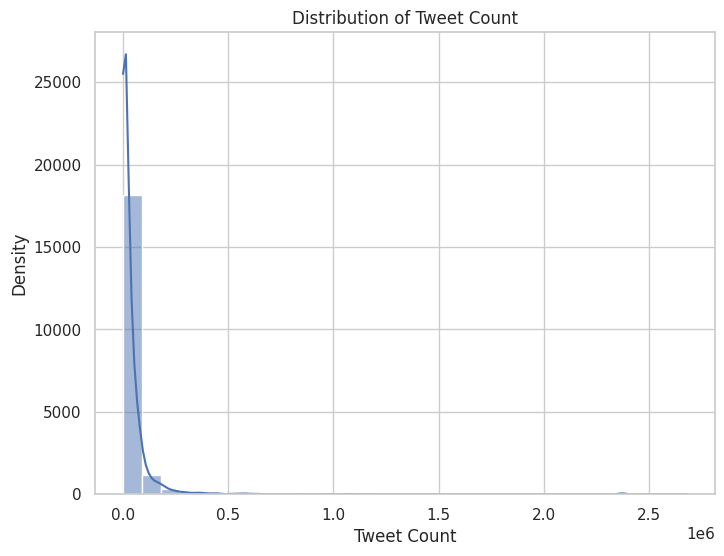

In [ ]:
# Distribution of tweet count
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['tweet_count'], kde=True, bins=30)
plt.title('Distribution of Tweet Count')
plt.xlabel('Tweet Count')
plt.ylabel('Density')
plt.show()

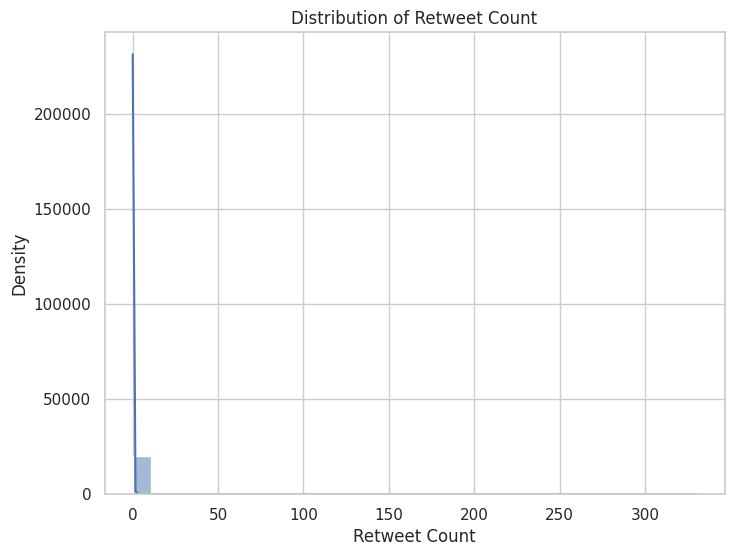

In [ ]:
# Distribution of retweet count
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['retweet_count'], kde=True, bins=30)
plt.title('Distribution of Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Density')
plt.show()

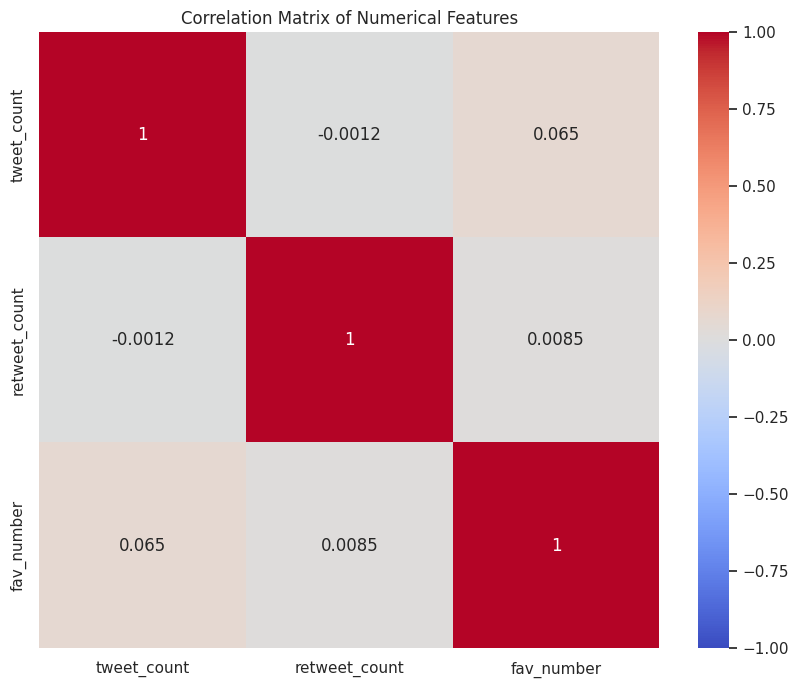

In [ ]:
# Correlation analysis for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[['tweet_count', 'retweet_count', 'fav_number']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# Extracting date from 'created' and 'tweet_created' for time-based analysis
df_cleaned['profile_created_year'] = pd.to_datetime(df_cleaned['created']).dt.year
df_cleaned['tweet_created_year'] = pd.to_datetime(df_cleaned['tweet_created']).dt.year

<ipython-input-64-329074fae944>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['profile_created_year'] = pd.to_datetime(df_cleaned['created']).dt.year
<ipython-input-64-329074fae944>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['tweet_created_year'] = pd.to_datetime(df_cleaned['tweet_created']).dt.year


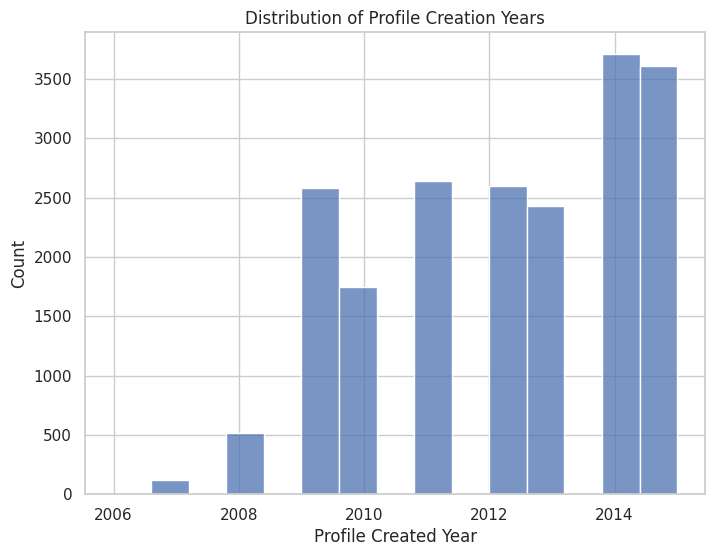

In [ ]:
# Plotting the distribution of profile creation over the years
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['profile_created_year'], kde=False, bins=15)
plt.title('Distribution of Profile Creation Years')
plt.xlabel('Profile Created Year')
plt.ylabel('Count')
plt.show()

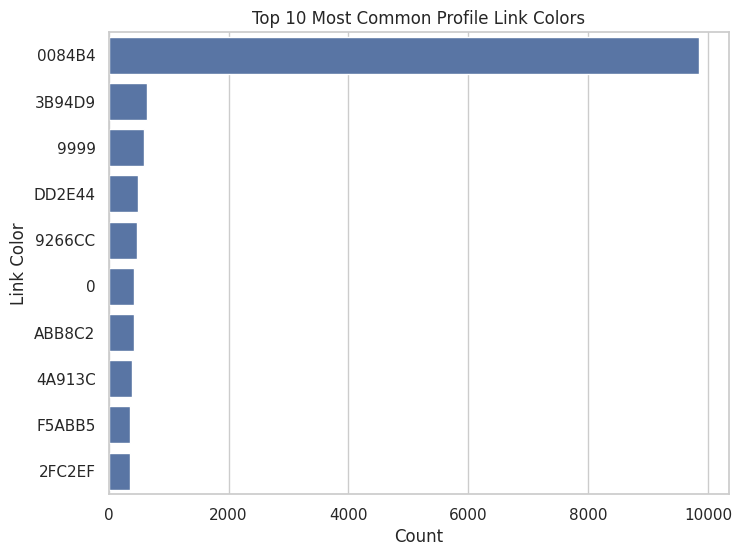

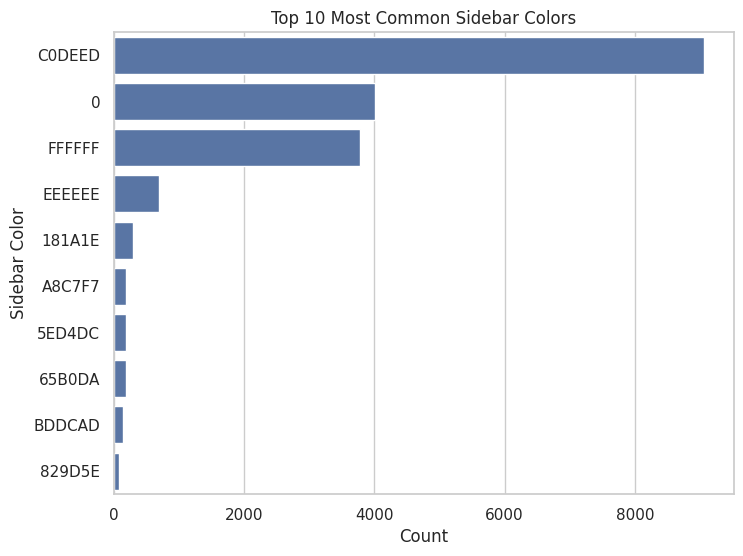

In [ ]:
# Exploring 'link_color' and 'sidebar_color' features
plt.figure(figsize=(8, 6))
sns.countplot(y='link_color', data=df_cleaned, order=df_cleaned['link_color'].value_counts().iloc[:10].index)
plt.title('Top 10 Most Common Profile Link Colors')
plt.ylabel('Link Color')
plt.xlabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(y='sidebar_color', data=df_cleaned, order=df_cleaned['sidebar_color'].value_counts().iloc[:10].index)
plt.title('Top 10 Most Common Sidebar Colors')
plt.ylabel('Sidebar Color')
plt.xlabel('Count')
plt.show()


# Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# drop columns that are irrelevant

col = ['gender', 'description', 'fav_number','link_color',
       'retweet_count', 'sidebar_color', 'text', 'tweet_count',
       ]

df_preprocessed = df_cleaned[col]

# Remove rows where gender is 'Unknown'
df_preprocessed = df_preprocessed[df_preprocessed['gender'] != 'unknown']

# Scaling numerical features
scaler = StandardScaler()
df_preprocessed[['tweet_count', 'retweet_count', 'fav_number']] = scaler.fit_transform(df_preprocessed[['tweet_count', 'retweet_count', 'fav_number']])

# change male=>0, female=>1, brand=>2
df_preprocessed.loc[df['gender'] == 'male', 'gender'] = 0
df_preprocessed.loc[df['gender'] == 'female', 'gender'] = 0
df_preprocessed.loc[df['gender'] == 'brand', 'gender'] = 1

# Check the first few rows of the preprocessed data
df_preprocessed.head()


,gender,description,fav_number,link_color,retweet_count,sidebar_color,text,tweet_count
0,0,i sing my own rhythm.,-0.353977,08C2C2,-0.030196,FFFFFF,Robbie E Responds To Critics After Win Against...,0.602953
1,0,I'm the author of novels filled with family dr...,-0.348524,0084B4,-0.030196,C0DEED,ÛÏIt felt like they were my friends and I was...,-0.265805
2,0,louis whining and squealing and all,0.263273,ABB8C2,0.335804,C0DEED,i absolutely adore when louis starts the songs...,-0.281368
3,0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",-0.337776,0084B4,-0.030196,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,-0.314308
4,0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,2.639077,3B94D9,-0.030196,0,Watching Neighbours on Sky+ catching up with t...,-0.064416


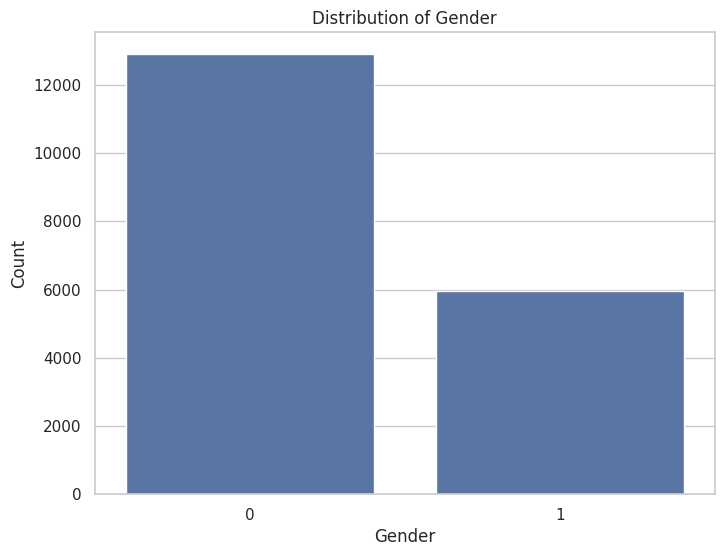

In [ ]:
# Distribution of gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df_preprocessed)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# The imbalanceness can be handled either using the model attribute class_weight or applying sampling techniques.

NLP Processing

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df_status = df_preprocessed.copy()
df_status = pd.concat([df_status['gender'], df_status['description']], axis=1)

df_status

,gender,description
0,0,i sing my own rhythm.
1,0,I'm the author of novels filled with family dr...
2,0,louis whining and squealing and all
3,0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
...,...,...
20045,0,(rp)
20046,0,"Whatever you like, it's not a problem at all. ..."
20047,0,#TeamBarcelona ..You look lost so you should f...
20048,0,Anti-statist; I homeschool my kids. Aspiring t...


In [ ]:
# make all lowercase since "Run" is not the same as "run" for machine computation
import re

description = []

for x in df_status['description']:
    desc = re.sub("[^a-zA-Z]"," ",x)
    desc = desc.lower()
    description.append(desc)

df_status['description'] = description
df_status

,gender,description
0,0,i sing my own rhythm
1,0,i m the author of novels filled with family dr...
2,0,louis whining and squealing and all
3,0,mobile guy ers shazam google kleiner pe...
4,0,ricky wilson the best frontman kaiser chiefs t...
...,...,...
20045,0,rp
20046,0,whatever you like it s not a problem at all ...
20047,0,teambarcelona you look lost so you should f...
20048,0,anti statist i homeschool my kids aspiring t...


In [ ]:
# remove stopwords in sentence ==> i,a,the,an,and,.,me,........
def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return filtered_words


df_status['tokenized'] = df_status['description'].apply(remove_stopwords)
df_status

,gender,description,tokenized
0,0,i sing my own rhythm,"[sing, rhythm]"
1,0,i m the author of novels filled with family dr...,"[author, novels, filled, family, drama, romance]"
2,0,louis whining and squealing and all,"[louis, whining, squealing]"
3,0,mobile guy ers shazam google kleiner pe...,"[mobile, guy, ers, shazam, google, kleiner, pe..."
4,0,ricky wilson the best frontman kaiser chiefs t...,"[ricky, wilson, best, frontman, kaiser, chiefs..."
...,...,...,...
20045,0,rp,[rp]
20046,0,whatever you like it s not a problem at all ...,"[whatever, like, problem, chargernation, forev..."
20047,0,teambarcelona you look lost so you should f...,"[teambarcelona, look, lost, follow, follow, he..."
20048,0,anti statist i homeschool my kids aspiring t...,"[anti, statist, homeschool, kids, aspiring, th..."


In [ ]:
# count word in sentence by changing tokenized to vectorizor (for machine compute)
# CountVectorizer input must be string with one long list

from sklearn.feature_extraction.text import CountVectorizer

max_features = 1500
corpus = [' '.join(words) for words in df_status['tokenized']]

vectorizer = CountVectorizer(max_features = max_features, stop_words = "english")
X = vectorizer.fit_transform(corpus).toarray()

# let's see X in dataframe
df_ = pd.DataFrame(X, columns=vectorizer.get_feature_names_out(), index=df_status.index)

df_

,academy,account,achieve,act,action,active,activist,actor,actress,actually,...,yes,yo,yoga,york,young,youth,youtube,youtuber,yrs,zayn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df_preprocessed['gender'].values # Create an array
y # gender ==> our target in the model

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

# Example Usage

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data into DMatrix format, which is the format that XGBoost expects
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'multi:softmax',  # Specify the objective for multi-class classification
    'num_class': len(np.unique(y_train)),  # Number of classes
    'max_depth': 3,  # Maximum tree depth
    'eta': 0.1,  # Learning rate
    'subsample': 0.8,  # Fraction of samples used for training each tree
    'colsample_bytree': 0.8,  # Fraction of features used for training each tree
    'eval_metric': 'mlogloss'  # Evaluation metric
}

# Train the XGBoost model
num_round = 100  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred = bst.predict(dtest)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test.tolist(), y_pred.tolist())

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73
